In [2]:
import pandas as pd

In [3]:
data=pd.read_csv("ARABIC-NEWS-MERGED-CLASS-COLLECTED.csv")

In [4]:
data.head()

,Title,Label,Topic,Origine,Article_date,Article_content,Article_correction
0,54 عاما في القضاء.. نهاية حزينة لمعركة مقدسي ح...,real,politics,df1,NaN,القدس المحتلة- لن يتمكن المقدسي سامي درويش في ...,NaN
1,خبراء إيرانيون يشرحون لماذا لا تستعجل طهران با...,real,politics,df1,NaN,طهران- منذ الهجوم الإسرائيلي على القنصلية الإي...,NaN
2,فلسطيني يقود فريق خبراء بإيطاليا لبناء قضية إب...,real,politics,df1,NaN,غادر المحامي الفلسطيني راجي صوراني قطاع غزة رف...,NaN
3,مستوطنون يهاجمون قرى نابلس بحماية من جنود الاح...,real,politics,df1,NaN,نابلس- لليوم الثاني على التوالي، تتعرض قرية دو...,NaN
4,جدل قانوني حول ترشح جاكوب زوما لانتخابات جنوب ...,real,politics,df1,NaN,بريتوريا- تقدمت اللجنة المستقلة للانتخابات في ...,NaN


In [5]:
data.shape

(56055, 7)

In [6]:
data.columns

Index(['Title', 'Label', 'Topic', 'Origine', 'Article_date', 'Article_content',
       'Article_correction'],
      dtype='object')

In [7]:
data.describe()

,Title,Label,Topic,Origine,Article_date,Article_content,Article_correction
count,12032,55149,49037,56055,10618,49973,2465
unique,7648,12,86,8,5318,12471,2419
top,اليمن -Yemen حملة COVID-19 vs F19,زائف,رياضة,df3,2024-04-12T01:59:53+03:00,[],['']
freq,200,37764,17035,37784,342,150,38


In [8]:
data.isnull().sum()

Title                 44023
Label                   906
Topic                  7018
Origine                   0
Article_date          45437
Article_content        6082
Article_correction    53590
dtype: int64

### DATA PREPROCESSING

In [9]:
columns=["Title","Topic","Origine","Article_date","Article_correction"]

In [10]:
data_v1=data.drop(columns=columns,axis=1)

In [11]:
data_v1.head()

,Label,Article_content
0,real,القدس المحتلة- لن يتمكن المقدسي سامي درويش في ...
1,real,طهران- منذ الهجوم الإسرائيلي على القنصلية الإي...
2,real,غادر المحامي الفلسطيني راجي صوراني قطاع غزة رف...
3,real,نابلس- لليوم الثاني على التوالي، تتعرض قرية دو...
4,real,بريتوريا- تقدمت اللجنة المستقلة للانتخابات في ...


In [12]:
data_v1.isnull().sum()

Label               906
Article_content    6082
dtype: int64

In [13]:
# Delete rows with empty values
data_v2=data_v1.dropna(axis=0)

In [14]:
data_v2.isnull().sum()

Label              0
Article_content    0
dtype: int64

In [15]:
data_v2.shape[0]

49973

In [16]:
data_v2["Label"].unique()

array(['real', 'fake', 'زائف', 'صحيح'], dtype=object)

In [17]:
data_v2["Label"]=data_v2["Label"].replace({"صحيح":"real"})
data_v2["Label"]=data_v2["Label"].replace({"زائف":"fake"})

C:\Users\NEXUS COMPUTERS\miniconda3\envs\myenv\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.
C:\Users\NEXUS COMPUTERS\miniconda3\envs\myenv\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


In [18]:
data_v2["Label"].unique()

array(['real', 'fake'], dtype=object)

In [19]:
from sklearn.preprocessing import LabelEncoder

In [20]:
encoder=LabelEncoder()

In [21]:
data_v2["Label"]=encoder.fit_transform(data_v2["Label"])

C:\Users\NEXUS COMPUTERS\miniconda3\envs\myenv\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [22]:
data_v2.head()

,Label,Article_content
0,1,القدس المحتلة- لن يتمكن المقدسي سامي درويش في ...
1,1,طهران- منذ الهجوم الإسرائيلي على القنصلية الإي...
2,1,غادر المحامي الفلسطيني راجي صوراني قطاع غزة رف...
3,1,نابلس- لليوم الثاني على التوالي، تتعرض قرية دو...
4,1,بريتوريا- تقدمت اللجنة المستقلة للانتخابات في ...


In [23]:
# Shuffle the DataFrame
data_v2_shuffled = data_v2.sample(frac=1, random_state=42)

# Calculate the number of "real" and "fake" labels
num_real = (data_v2["Label"] == 1).sum()
num_fake = (data_v2["Label"] == 0).sum()

print(num_fake)
print(num_real)

# Calculate the proportion of each label
prop_real = num_real / len(data_v2)
prop_fake = num_fake / len(data_v2)

# Split the shuffled DataFrame into "real" and "fake" parts
data_real = data_v2_shuffled[data_v2_shuffled["Label"] == 1]
data_fake = data_v2_shuffled[data_v2_shuffled["Label"] == 0]

# Calculate the number of samples for each label in the shuffled DataFrame
num_real_shuffled = int(len(data_v2_shuffled) * prop_real)
num_fake_shuffled = int(len(data_v2_shuffled) * prop_fake)
print(num_fake_shuffled )
print(num_real_shuffled )

# Take the required number of samples for each label
data_real_shuffled = data_real.sample(n=num_real_shuffled, random_state=42)
data_fake_shuffled = data_fake.sample(n=num_fake_shuffled, random_state=42)

# Concatenate the shuffled "real" and "fake" parts back together
data_v2_shuffled_proportionate = pd.concat([data_real_shuffled, data_fake_shuffled])

# Shuffle the concatenated DataFrame again to mix the "real" and "fake" samples
data_v2_shuffled_proportionate = data_v2_shuffled_proportionate.sample(frac=1, random_state=42)

44313
5660
44313
5660


In [24]:
data_v2_shuffled_proportionate.head()

,Label,Article_content
46117,0,لا صحة لخبر رفع الحجر الصحي عن جميع ولايات الج...
4445,0,"['الإدعاء\nصحيفة ""المصري اليوم"" نشرت خبر بيقول..."
10681,0,التصميم مفبرك والجزيرة لم تنشر خبرًا عن سيطرة ...
44590,1,قصة بول ألكسندر الذي يعيش داخل إسطوانة حديدية ...
44093,0,وزارة الصحة الفلسطينية تنفي اتهام حسين الشيخ ب...


In [28]:
data_v2_shuffled_proportionate['Article_content'][2]

'غادر المحامي الفلسطيني راجي صوراني قطاع غزة رفقة عائلته مع احتدام الحرب لينضم إلى زملائه في صقلية بإيطاليا لمحاولة تقديم إسرائيل إلى محكمة العدل الدولية. ورد ذلك في تقرير نشرته "الجزيرة الإنجليزية" وكتبته الصحفية المستقلة ستيفانيا دينوتي قالت فيه إن فريقا من المحامين من المركز الفلسطيني لحقوق الإنسان والخبراء الإيطاليين يقودهم المحامي صوراني بدأ يعمل خلال الشهرين الماضيين على بناء قضية إبادة جماعية ضد إسرائيل. وأضافت أنها شاهدت في مدينة ميسينا بصقلية الإيطالية بمكتب البروفيسور تريستينو مارينييلو الأستاذ بجامعة جون مورس بليفربول/المملكة المتحدة والخبير في العدالة الجنائية الدولية وحقوق الإنسان والذي تستشيره العديد من الحكومات وغير الحكومات، أكواما من الوثائق باللغتين الإنجليزية والعربية. وقالت إن الفريق اتخذ من مدينة ميسينا في جنوب إيطاليا، والتي تطل على مياه البحر الأبيض المتوسط من جهة وبركان إتنا الذي ينبعث منه الدخان من جهة أخرى، مكانا لعمله. وقال مارينييلو للجزيرة إنهم يعتقدون أنها طريقة جيدة حتى يكونوا أكثر إنتاجية في مكان يمكنهم فيه بالفعل فصل أنفسهم عن الأهوال المستمرة، "على الر

In [29]:
import nltk
import re
from nltk.corpus import stopwords

In [30]:
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to C:\Users\NEXUS
[nltk_data]     COMPUTERS\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [32]:
!pip install snowballstemmer

In [37]:
import pandas as pd
from nltk.corpus import stopwords
from snowballstemmer import stemmer
import re

arabic_stopwords = set(stopwords.words('arabic'))
arabic_stemmer = stemmer('arabic')

for index, row in data_v2_shuffled_proportionate.iterrows():
    article_content = row['Article_content']  # Store content for clarity

    # Remove non-Arabic characters
    article_content = re.sub('[^\u0621-\u064A\s]', ' ', article_content)

    # Lowercase and split into words
    article_content = article_content.lower().split()

    # Remove stopwords and stem the words
    article_content = [arabic_stemmer.stemWord(word) for word in article_content if not word in arabic_stopwords]

    # Update the DataFrame column with the processed content
    row['Article_content'] = ' '.join(article_content)

# Update the DataFrame in-place (optional, depending on your needs)
data_v2_shuffled_proportionate = data_v2_shuffled_proportionate.copy()  # Create a copy if needed

In [38]:
data_v2_shuffled_proportionate.head()

,Label,Article_content
46117,0,لا صحة لخبر رفع الحجر الصحي عن جميع ولايات الج...
4445,0,"['الإدعاء\nصحيفة ""المصري اليوم"" نشرت خبر بيقول..."
10681,0,التصميم مفبرك والجزيرة لم تنشر خبرًا عن سيطرة ...
44590,1,قصة بول ألكسندر الذي يعيش داخل إسطوانة حديدية ...
44093,0,وزارة الصحة الفلسطينية تنفي اتهام حسين الشيخ ب...


#### TOKENIZATION

In [39]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences

In [40]:
vocab_size = 10000
embedding_dim = 16
max_length = 100
trunc_type='post'
padding_type='post'
oov_tok = "<OOV>"
training_size = 40000

In [41]:
train_val_sentences=data_v2_shuffled_proportionate["Article_content"][0:training_size]
testing_sentences=data_v2_shuffled_proportionate["Article_content"][training_size:]
training_val_labels=data_v2_shuffled_proportionate["Label"][0:training_size]
testing_labels=data_v2_shuffled_proportionate["Label"][training_size:]

In [42]:
validation_size=8000
validation_sentences=train_val_sentences[0:validation_size]
validation_labels=training_val_labels[0:validation_size]

training_sentences=train_val_sentences[validation_size:]
training_labels=training_val_labels[validation_size:]

### MODEL CONSTRUCTION

In [43]:
tokenizer=Tokenizer(num_words=vocab_size,oov_token=oov_tok)
tokenizer.fit_on_texts(training_sentences)
word_index=tokenizer.word_index


training_sequences=tokenizer.texts_to_sequences(training_sentences)
training_to_padded=pad_sequences(training_sequences,maxlen=max_length, padding=padding_type,truncating=trunc_type)

validation_sequences=tokenizer.texts_to_sequences(validation_sentences)
validation_to_padded=pad_sequences(validation_sequences,maxlen=max_length, padding=padding_type,truncating=trunc_type)

testing_sequences=tokenizer.texts_to_sequences(testing_sentences)
testing_to_padded=pad_sequences(testing_sequences, maxlen=max_length, padding=padding_type,truncating=trunc_type)

In [44]:
print(validation_to_padded[0])
print(validation_to_padded.shape)

[  26   66  245  631 4145 2244    9  143 7431  178 6928    3  508 1075
  119    0    0    0    0    0    0    0    0    0    0    0    0    0
    0    0    0    0    0    0    0    0    0    0    0    0    0    0
    0    0    0    0    0    0    0    0    0    0    0    0    0    0
    0    0    0    0    0    0    0    0    0    0    0    0    0    0
    0    0    0    0    0    0    0    0    0    0    0    0    0    0
    0    0    0    0    0    0    0    0    0    0    0    0    0    0
    0    0]
(8000, 100)


In [45]:
model=tf.keras.Sequential(
    [
        tf.keras.layers.Embedding(vocab_size,embedding_dim, input_length=max_length),
        tf.keras.layers.Bidirectional(tf.keras.layers.LSTM(max_length)),
        tf.keras.layers.Dense(max_length, activation='relu'),
        tf.keras.layers.Dense(1, activation='sigmoid')
    ]
)

In [53]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding (Embedding)        (None, 100, 16)           160000    
_________________________________________________________________
bidirectional (Bidirectional (None, 200)               93600     
_________________________________________________________________
dense (Dense)                (None, 100)               20100     
_________________________________________________________________
dense_1 (Dense)              (None, 1)                 101       
Total params: 273,801
Trainable params: 273,801
Non-trainable params: 0
_________________________________________________________________


In [46]:
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'] )

In [48]:
import numpy as np
training_labels_np = np.array(training_labels)
validation_labels_np = np.array(validation_labels)
num_epochs=5
history=model.fit(training_to_padded, training_labels_np, epochs=num_epochs, validation_data=(validation_to_padded,validation_labels_np), verbose=2)

Epoch 1/5
1000/1000 - 75s - loss: 0.0071 - accuracy: 0.9979 - val_loss: 0.0174 - val_accuracy: 0.9944
Epoch 2/5
1000/1000 - 79s - loss: 0.0023 - accuracy: 0.9992 - val_loss: 0.0104 - val_accuracy: 0.9970
Epoch 3/5
1000/1000 - 79s - loss: 7.9627e-04 - accuracy: 0.9997 - val_loss: 0.0091 - val_accuracy: 0.9975
Epoch 4/5
1000/1000 - 79s - loss: 0.0010 - accuracy: 0.9998 - val_loss: 0.0136 - val_accuracy: 0.9964
Epoch 5/5
1000/1000 - 80s - loss: 0.0013 - accuracy: 0.9998 - val_loss: 0.0110 - val_accuracy: 0.9959


In [49]:
predictions=model.predict(testing_to_padded)

In [50]:
predictions=predictions.round()

In [51]:
predictions

array([[0.],
       [0.],
       [0.],
       ...,
       [0.],
       [1.],
       [0.]], dtype=float32)

In [55]:
from sklearn.metrics import precision_score, recall_score, f1_score

# Calculate precision, recall, and f1-score
precision = precision_score(testing_labels, predictions)
recall = recall_score(testing_labels, predictions)
f1 = f1_score(testing_labels, predictions)

print("Precision:", precision)
print("Recall:", recall)
print("F1-score:", f1)

Precision: 0.9794168096054888
Recall: 0.9913194444444444
F1-score: 0.9853321829163072


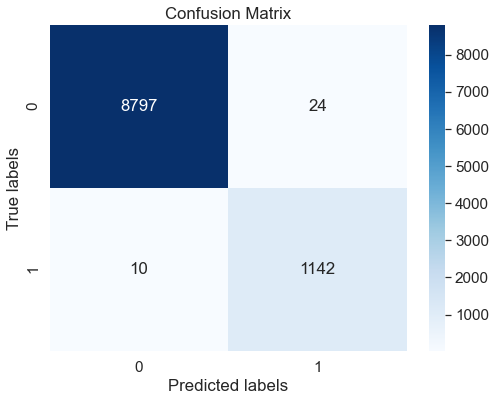

In [58]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix

# Example confusion matrix
cm = confusion_matrix(testing_labels,predictions)

# Define labels for the matrix
labels = ['True Negative', 'False Positive', 'False Negative', 'True Positive']
categories = ['0', '1']

# Plot confusion matrix
sns.set(font_scale=1.4) # for label size
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='g', cmap='Blues', xticklabels=categories, yticklabels=categories)

plt.xlabel('Predicted labels')
plt.ylabel('True labels')
plt.title('Confusion Matrix')
plt.show()


In [59]:
from sklearn.metrics import accuracy_score
accuracy_score(testing_labels,predictions)

0.9965907951468966

In [60]:
from sklearn.metrics import classification_report
print(classification_report(testing_labels,predictions))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00      8821
           1       0.98      0.99      0.99      1152

    accuracy                           1.00      9973
   macro avg       0.99      0.99      0.99      9973
weighted avg       1.00      1.00      1.00      9973

